In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [2]:
def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m )[0]
    return pr.choice(indices)

In [3]:
register(
    id = 'FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs = {'map_name':"4x4",'is_slippery':False}
)
env = gym.make('FrozenLake-v3')

[2017-04-03 04:51:05,834] Making new env: FrozenLake-v3


In [5]:
Q = np.zeros([env.observation_space.n,env.action_space.n])
num_episodes = 4000
rList = []
total_move_count = []
for i in range(num_episodes):
    state = env.reset()
    rAll = 0 
    done = False
    move_count = 0
    while not done:
        action = rargmax(Q[state,:])
        new_state, reward, done,_ = env.step(action)
        Q[state,action] = reward + np.max(Q[new_state,:])
        rAll += reward
        state = new_state
        move_count+=1

    rList.append(rAll)
    total_move_count.append(move_count)

Success rate: 0.963
Final Q-Table Values
LEFT DOWN RIGHT UP
[[ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]]


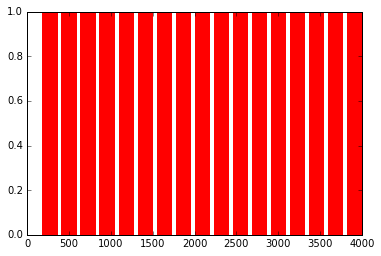

In [6]:
print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)),rList,color= "red",edgecolor='none')
plt.show()